In [48]:
import pandas as pd
import json
from pathlib import Path
import csv
import sqlalchemy as sql
from sqlalchemy import create_engine
%matplotlib inline
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt

In [39]:
ada_price_engine = sql.create_engine("sqlite:///ada_price_data_df.db")

In [40]:
ada_tweet_count_engine = sql.create_engine("sqlite:///ada_tweet_count_df.db")

In [41]:
sql_query1 = """SELECT Timestamp, Value FROM ada_price_data_df1"""
df1 = pd.read_sql(sql_query1, con=ada_price_engine)
sql_query2 = """SELECT Timestamp, tweet_count FROM ada_tweet_count_df1"""
df2 = pd.read_sql(sql_query2, con=ada_tweet_count_engine)

In [42]:
df2.head()

,Timestamp,tweet_count
0,2021-10-03 00:00:00.000000,14641
1,2021-10-03 01:00:00.000000,21166
2,2021-10-03 02:00:00.000000,26473
3,2021-10-03 03:00:00.000000,31949
4,2021-10-03 04:00:00.000000,35054


In [43]:
merged_df = pd.merge(df1, df2, how="left")

In [44]:
merged_df.head()

,Timestamp,Value,tweet_count
0,2021-10-02 16:00:00.000000,2.250,NaN
1,2021-10-02 17:00:00.000000,2.234,NaN
2,2021-10-02 18:00:00.000000,2.245,NaN
3,2021-10-02 19:00:00.000000,2.251,NaN
4,2021-10-02 20:00:00.000000,2.263,NaN


In [45]:
merged_df = merged_df.dropna()

In [46]:
merged_df.head()

,Timestamp,Value,tweet_count
8,2021-10-03 00:00:00.000000,2.273,14641.0
9,2021-10-03 01:00:00.000000,2.280,21166.0
10,2021-10-03 02:00:00.000000,2.250,26473.0
11,2021-10-03 03:00:00.000000,2.251,31949.0
12,2021-10-03 04:00:00.000000,2.277,35054.0


No handles with labels found to put in legend.


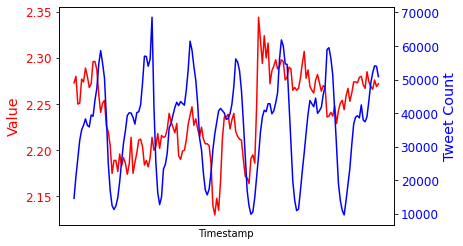

<Figure size 864x432 with 0 Axes>

In [55]:
fig, ax_data = plt.subplots()

fig = plt.figure(figsize=(12,6))

ax_data.set_xlabel("Timestamp")

ax_data.tick_params(axis="x", bottom=False, labelbottom=False)

ax_data.set_ylabel("Value", color="red", size="x-large")

ax_data.tick_params(axis="y", labelcolor="red", labelsize="large")

ax_data.plot(merged_df["Timestamp"], merged_df["Value"], color="red")

ax_tweet_count = ax_data.twinx()
ax_tweet_count.set_ylabel("Tweet Count", color="blue", size="x-large")

ax_tweet_count.tick_params(axis="y", labelcolor="blue", labelsize="large")
ax_tweet_count.plot(merged_df["Timestamp"], merged_df["tweet_count"], color="blue")

fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax_data.transAxes)

plt.show()

In [102]:
merged_df.describe()

,Value,tweet_count
count,163.000000,163.000000
mean,51758.942086,21888.171779
std,2896.508466,6907.328904
min,47309.440000,9134.000000
25%,48932.165000,17007.500000
50%,51559.970000,20521.000000
75%,54555.315000,25319.500000
max,55823.610000,60330.000000


In [56]:
merged_df["Value"].pct_change()

8           NaN
9      0.003080
10    -0.013158
11     0.000444
12     0.011550
         ...   
164   -0.002199
165   -0.001322
166    0.004413
167   -0.003076
168    0.001322
Name: Value, Length: 161, dtype: float64

In [57]:
merged_df["tweet_count"].pct_change()

8           NaN
9      0.445666
10     0.250732
11     0.206852
12     0.097186
         ...   
164    0.119723
165    0.062524
166    0.039364
167   -0.002773
168   -0.056755
Name: tweet_count, Length: 161, dtype: float64

In [58]:
merged_df.corr()

,Value,tweet_count
Value,1.000000,0.181308
tweet_count,0.181308,1.000000
